Check available pipelines [here](https://huggingface.co/docs/transformers/main_classes/pipelines)

In [1]:
from transformers import pipeline

The piepline function is the most high-level API of the Transformers library.

It regroups together all the steps to go from raw tests to usable predictions: from pre-processing the inputs, processing them through a model, and post-processing the predictions.

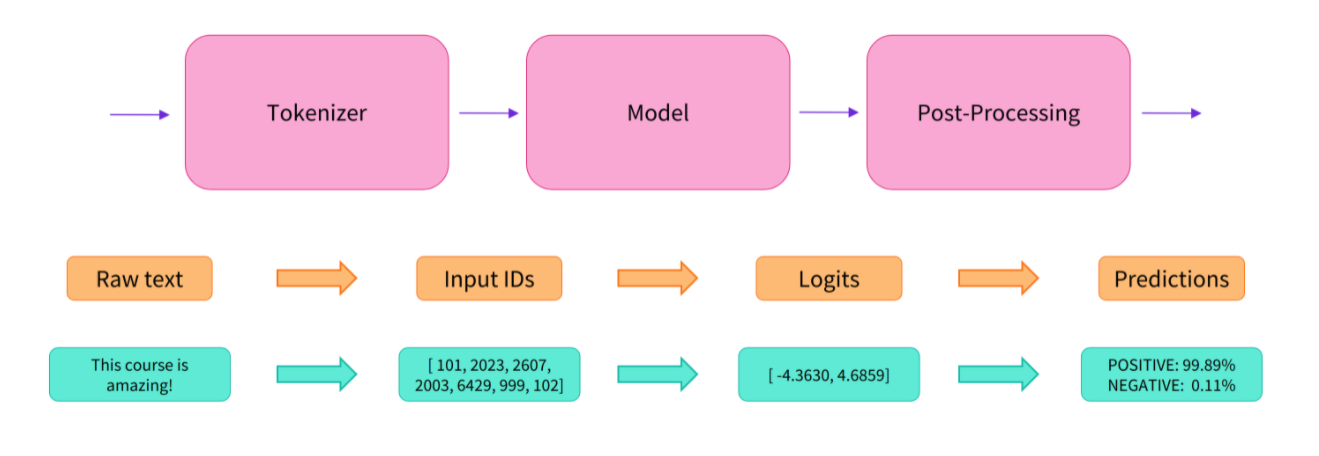

# Example 1: Sentiment Analysis

We can test the sentiment analysis pipeline, which performs text classification on a given input, and determines if it is positive or negative.

In [ ]:
classifier = pipeline("sentiment-analysis")

In [4]:
classifier([
    "I've been waiting for a HuggingFace course my whole life.",
    "Would be better if it was not so expensive.",
])

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9958614706993103}]

# Example 2: Zero-shot classification

A more challenging task where we need to classify texts that haven’t been labelled. This is a common scenario in real-world projects because annotating text is usually time-consuming and requires domain expertise. For this use case, the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model.

You don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification")

In [6]:
zero_shot_classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445994257926941, 0.11197388917207718, 0.0434267558157444]}

# Example 3: Text Generation

The text generation pipeline will auto-complete a given prompt. The output is generated with a bit of randomness. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text.

You can control how many different sequences are generated with the argument `num_return_sequences` and the total length of the output text with the argument `max_length`.

In [ ]:
generator = pipeline('text-generation')

In [9]:
generator("In this course, we will teach you how to")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to use CSS components to achieve common features such as ease-of-use and readability of HTML and CSS (or a few others). As a quick example, let's imagine an application, with an"}]

# Example 4: Mask filling

The `top_k` argument controls how many possibilities you want to be displayed. Note that here the model fills in the special `<mask>` word, which is often referred to as a mask token. **Other mask-filling models might have different mask tokens**, so it’s always good to verify the proper mask word when exploring other models. One way to check it is by looking at the mask word used in the widget.

In [ ]:
unmasker = pipeline("fill-mask")

In [23]:
unmasker("the <mask> is faster than the bicycle.", top_k=5)

[{'score': 0.08093800395727158,
  'token': 512,
  'token_str': ' car',
  'sequence': 'the car is faster than the bicycle.'},
 {'score': 0.06574241816997528,
  'token': 36397,
  'token_str': ' treadmill',
  'sequence': 'the treadmill is faster than the bicycle.'},
 {'score': 0.05802743881940842,
  'token': 14678,
  'token_str': ' bicycle',
  'sequence': 'the bicycle is faster than the bicycle.'},
 {'score': 0.05777046084403992,
  'token': 11038,
  'token_str': ' pedestrian',
  'sequence': 'the pedestrian is faster than the bicycle.'},
 {'score': 0.043803080916404724,
  'token': 19953,
  'token_str': ' automobile',
  'sequence': 'the automobile is faster than the bicycle.'}]

# Example 5: Named Entity Recognition (NER)

We can also classify each word in a sentence into categories. A common problem is Named Entity Recognition (NER), where the model has to find the entities, such as names, dates, organizations, etc, in the text.

We pass the option `grouped_entities=True` in the pipeline creation function to tell the pipeline to regroup together the parts of the sentence that correspond to the same entity: here the model correctly grouped “Hugging” and “Face” as a single organization, even though the name consists of multiple words. In fact, as we will see in the next chapter, the preprocessing even splits some words into smaller parts. For instance, Sylvain is split into four pieces: S, ##yl, ##va, and ##in. In the post-processing step, the pipeline successfully regrouped those pieces.

In [ ]:
ner = pipeline("ner", grouped_entities=True)

In [25]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

# Example 6: Question answering

Another task available is question answering, which will provide an answer to a question asked based on the context given.

**Note that this pipeline works by extracting information from the provided context; it does not generate the answer.**

In [ ]:
question_answerer = pipeline("question-answering")

In [29]:
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn"
)

{'score': 0.6949770450592041, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

# Example 7: Summarization

Getting summaries of long texts is also possible with the summarization pipeline.

Like with text generation, you can specify a `max_length` or a `min_length` for the result.

In [ ]:
summarizer = pipeline("summarization")

In [31]:
summarizer("""
Machine learning (ML) is the study of computer algorithms that improve automatically through experience.
It is seen as a part of artificial intelligence.
Machine learning algorithms build a model based on sample data, known as "training data",
in order to make predictions or decisions without being explicitly programmed to do so.
Machine learning algorithms are used in a wide variety of applications, such as in medicine,
email filtering, speech recognition, and computer vision,
where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.
""")

Your max_length is set to 142, but your input_length is only 115. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


[{'summary_text': ' Machine learning (ML) is the study of computer algorithms that improve automatically through experience . It is seen as a part of artificial intelligence . Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so .'}]

# Example 8: Translation

There is also a translation pipeline that can translate text from one language to another.

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

In [35]:
translator("I like pepperoni pizza with extra cheese")

[{'translation_text': 'Me gusta la pizza de pepperoni con queso extra'}]

# Example 9: Using other models

Up until now, we have used the pipeline API with the default models associated to each task, but we can use it with any model that has been pretrained or fine-tuned on this task.

We can also choose a particular model from the [Model Hub](https://huggingface.co/models) to use in a pipeline for a specific task — say, text generation. Go to the Model Hub and click on the corresponding tag on the left to display only the supported models for that task. We can find selector for language, licenses, etc.

In [10]:
messages = [
    {"role": "user", "content": "Who are you?"},
]

In [16]:
generator = pipeline(
    "text-generation",
    model="Qwen/Qwen2-1.5B-Instruct",
    max_length=100,
    num_return_sequences=2,
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [17]:
generator(messages)

[{'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': 'I am a large language model created by Alibaba Cloud. I am called Qwen.'}]},
 {'generated_text': [{'role': 'user', 'content': 'Who are you?'},
   {'role': 'assistant',
    'content': 'I am a large language model created by Alibaba Cloud. I am called Qwen.'}]}]